In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dispest import swsradon
from scipy.interpolate import interp1d

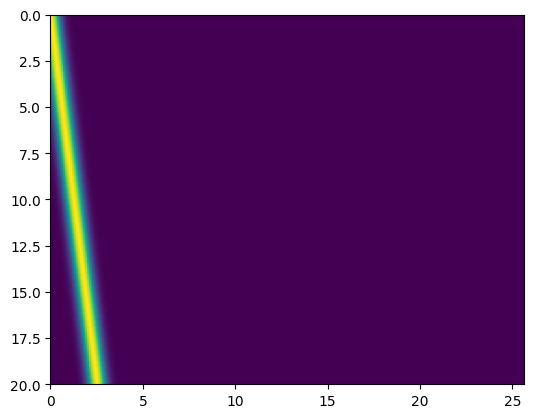

In [2]:
latmin = 0
latmax = 20E-3
nlat = 64

tmin = 0
tmax = 25.6E-3
nt = 256
bw = 0.5E-3

cmax = 9.0
cmin = 8.0
nc = 1

rand = np.random.default_rng()
cfunc = interp1d(np.linspace(latmin, latmax, nc+1), rand.uniform(cmin, cmax, nc+1))

lat = np.linspace(latmin, latmax, nlat).reshape((-1,1))
t = np.linspace(tmin, tmax, nt).reshape((1,-1))
t0 = t-lat/cmin
disp = np.exp(-(t0/bw)**2)

extent = 1E3*np.array([
    np.min(t),
    np.max(t),
    np.max(lat),
    np.min(lat)
])
plt.figure()
plt.imshow(disp, extent=extent)
plt.show()

2.1526418786692834e-05 4.44841862800244e-06 -2.9980186971557485e-06 [49.95079208 49.99485215 49.97656153] [49.97235587 49.99485215 49.95498494]
2.1526418786692834e-05 4.44841862800244e-06 -2.9980186971557485e-06 [49.95079208 49.99485215 49.97656153] [49.97235587 49.99485215 49.95498494] 0.00027005870841487266 0.0022289628180039134


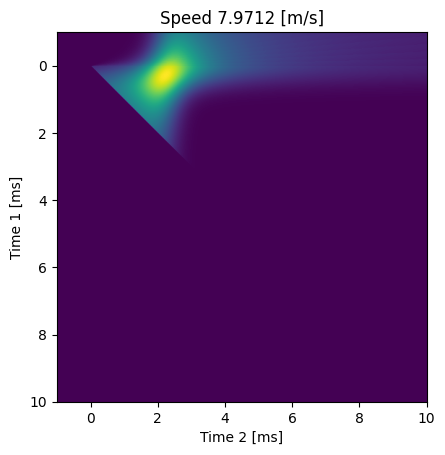

In [3]:
c, sums, teval = swsradon(disp, lat, t, 2E-3, 18E-3, -1E-3, 10E-3, N=512, speedonly=False)
extent = 1E3*np.array([
    np.min(teval), np.max(teval),
    np.max(teval), np.min(teval)
])
plt.figure()
plt.imshow(sums, extent=extent)
plt.title(f"Speed {c:0.04f} [m/s]")
plt.ylabel("Time 1 [ms]")
plt.xlabel("Time 2 [ms]")
plt.show()